## 1. 4th Order Runge-Kutta Integrator (RK4)

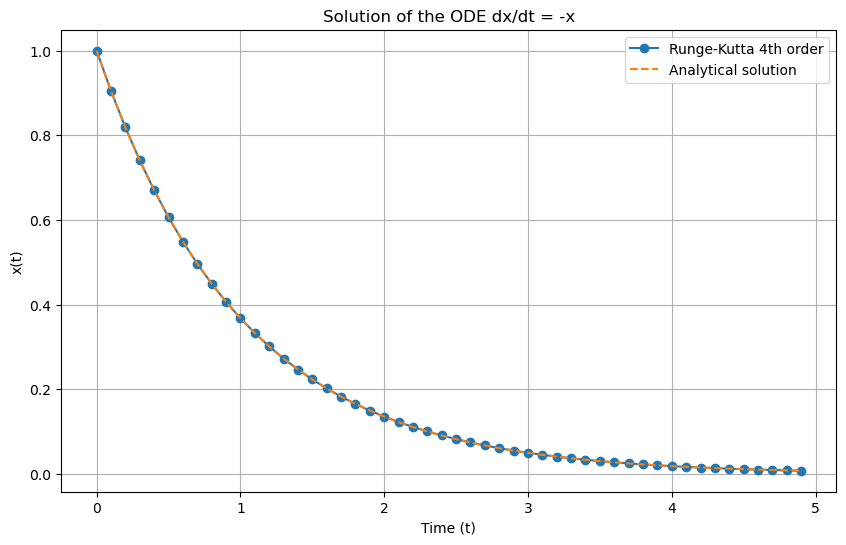

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ode(x, t, r):
    return -r * x

def runge_kutta_4(f, x0, t0, tf, dt, *args):
    t = np.arange(t0, tf, dt)
    x = np.zeros(t.size)
    x[0] = x0

    for i in range(1, t.size):
        t_current = t[i-1]
        x_current = x[i-1]

        k1 = dt * f(x_current, t_current, *args)
        k2 = dt * f(x_current + 0.5 * k1, t_current + 0.5 * dt, *args)
        k3 = dt * f(x_current + 0.5 * k2, t_current + 0.5 * dt, *args)
        k4 = dt * f(x_current + k3, t_current + dt, *args)

        x[i] = x_current + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t, x

# Parameters
r = 1
x0 = 1
t0 = 0
tf = 5
dt = 0.1

t, x_rk4 = runge_kutta_4(ode, x0, t0, tf, dt, r)

x_analytical = x0 * np.exp(-r * t)

plt.figure(figsize=(10, 6))
plt.plot(t, x_rk4, label='Runge-Kutta 4th order', marker='o')
plt.plot(t, x_analytical, label='Analytical solution', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Solution of the ODE dx/dt = -x')
plt.legend()
plt.grid(True)
plt.show()


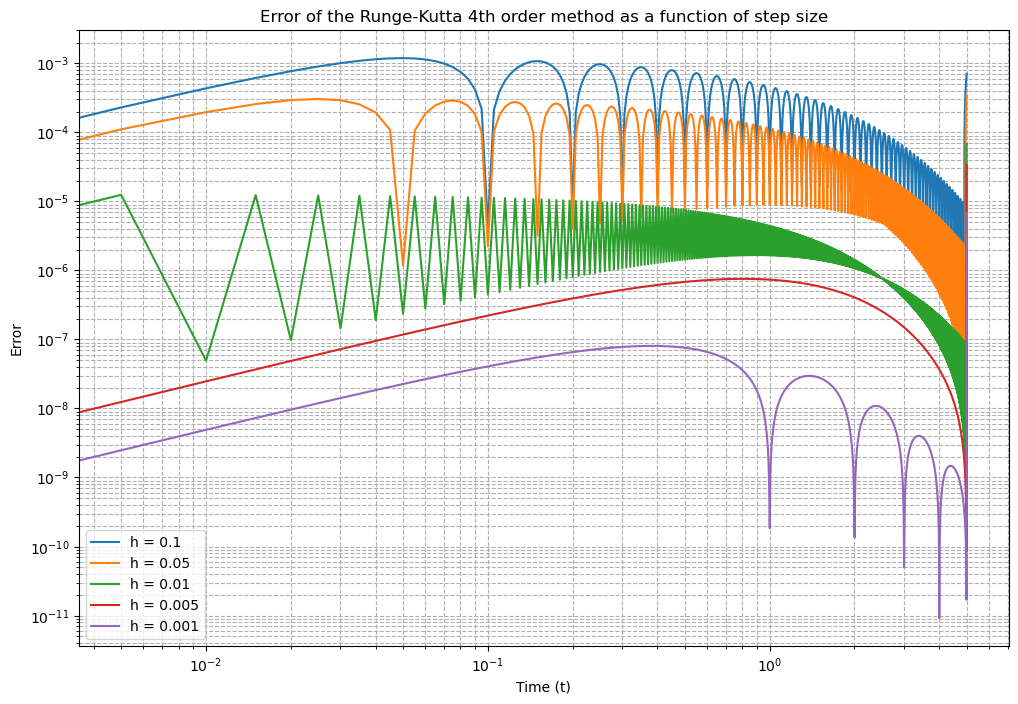

In [2]:

# Parameters
r = 1
x0 = 1
t0 = 0
tf = 5
step_sizes = [0.1, 0.05, 0.01, 0.005, 0.001]

t_analytical = np.linspace(t0, tf, 1000)
x_analytical = x0 * np.exp(-r * t_analytical)

# Plot the results
plt.figure(figsize=(12, 8))

for dt in step_sizes:
    # Solve the ODE using Runge-Kutta 4th order
    t_rk4, x_rk4 = runge_kutta_4(ode, x0, t0, tf, dt, r)

    # Calculate the error
    x_rk4_interp = np.interp(t_analytical, t_rk4, x_rk4)
    error = np.abs(x_rk4_interp - x_analytical)

    # Plot the error
    plt.loglog(t_analytical, error, label=f'h = {dt}')

plt.xlabel('Time (t)')
plt.ylabel('Error')
plt.title('Error of the Runge-Kutta 4th order method as a function of step size')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


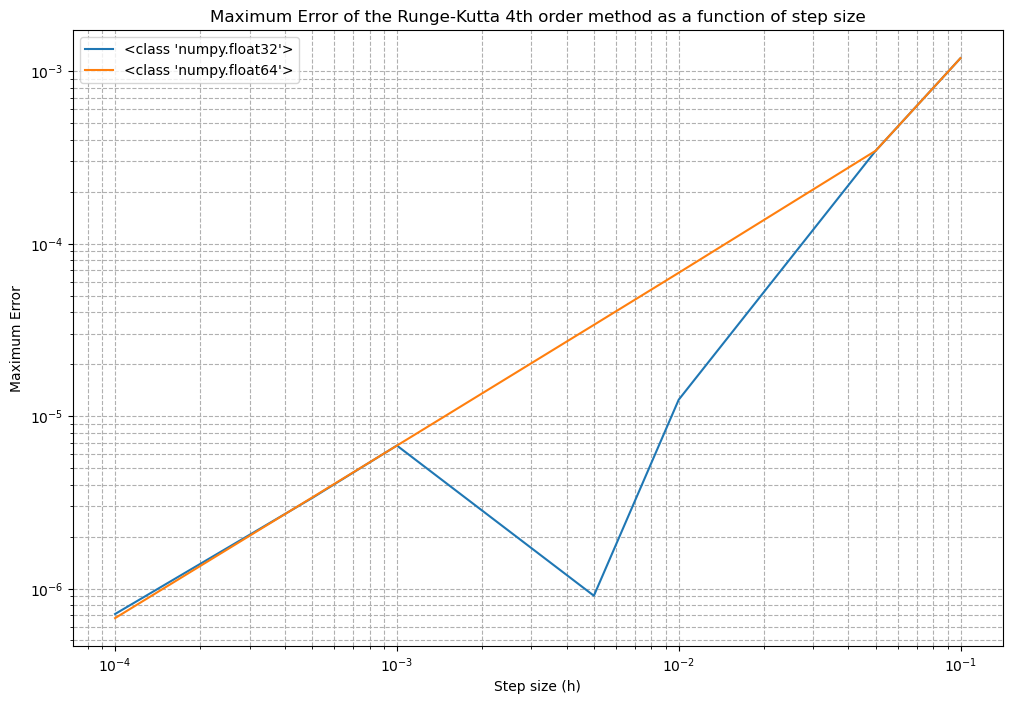

In [4]:
def runge_kutta_4(f, x0, t0, tf, dt, dtype, *args):
    t = np.arange(t0, tf, dt, dtype=dtype)
    x = np.zeros(t.size, dtype=dtype)
    x[0] = dtype(x0)

    for i in range(1, t.size):
        t_current = t[i-1]
        x_current = x[i-1]

        k1 = dt * f(x_current, t_current, *args)
        k2 = dt * f(x_current + 0.5 * k1, t_current + 0.5 * dt, *args)
        k3 = dt * f(x_current + 0.5 * k2, t_current + 0.5 * dt, *args)
        k4 = dt * f(x_current + k3, t_current + dt, *args)

        x[i] = x_current + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t, x

# Parameters
r = 1
x0 = 1
t0 = 0
tf = 5
step_sizes = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

# Analytical solution
t_analytical = np.linspace(t0, tf, 1000)
x_analytical = x0 * np.exp(-r * t_analytical)

# Plot the results
plt.figure(figsize=(12, 8))

for dtype in [np.float32, np.float64]:
    errors = []
    for dt in step_sizes:
        # Solve the ODE using Runge-Kutta 4th order
        t_rk4, x_rk4 = runge_kutta_4(ode, x0, t0, tf, dtype(dt), dtype, r)

        # Calculate the error
        x_rk4_interp = np.interp(t_analytical, t_rk4, x_rk4)
        error = np.abs(x_rk4_interp - x_analytical)
        errors.append(np.max(error))

    # Plot the errors
    plt.loglog(step_sizes, errors, label=f'{dtype}')

plt.xlabel('Step size (h)')
plt.ylabel('Maximum Error')
plt.title('Maximum Error of the Runge-Kutta 4th order method as a function of step size')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


Single Precision (float32): As the step size decreases, the error initially decreases, but beyond a certain threshold, numerical truncation errors begin to dominate, and the error start to increase and/or plateau.
Double Precision (float64): The error continues to decrease as the step size decreases, and the threshold beyond which numerical truncation errors dominate is much smaller compared to single precision.

## 2. Three-Body Problem

For the 3-body problem in 2D, we have three bodies with positions $(x_i, y_i)$ and velocities $(v_{x,i}, v_{y,i})$ for $i = 1, 2, 3$. The equations of motion for each body can be derived from Newton's law of universal gravitation.

The force on body $i$ due to body $j$ is given by:

$
F_{x,i} = \sum_{j \neq i} \frac{m_j (x_j - x_i)}{r_{ij}^3}
$

$
F_{y,i} = \sum_{j \neq i} \frac{m_j (y_j - y_i)}{r_{ij}^3}
$

where $r_{ij} = \sqrt{(x_j - x_i)^2 + (y_j - y_i)^2}$ is the distance between body $i$ and body $j$, and $m_j$ is the mass of body $j$.

The equations of motion for each body are:

$
\frac{d x_i}{dt} = v_{x,i}
$

$
\frac{d y_i}{dt} = v_{y,i}
$

$
\frac{d v_{x,i}}{dt} = F_{x,i}
$

$
\frac{d v_{y,i}}{dt} = F_{y,i}
$

For three bodies, this results in a system of 12 coupled first-order ODEs:

$
\frac{d}{dt} \begin{pmatrix} x_1 \\ y_1 \\ v_{x,1} \\ v_{y,1} \\ x_2 \\ y_2 \\ v_{x,2} \\ v_{y,2} \\ x_3 \\ y_3 \\ v_{x,3} \\ v_{y,3} \end{pmatrix} = \begin{pmatrix} v_{x,1} \\ v_{y,1} \\ F_{x,1} \\ F_{y,1} \\ v_{x,2} \\ v_{y,2} \\ F_{x,2} \\ F_{y,2} \\ v_{x,3} \\ v_{y,3} \\ F_{x,3} \\ F_{y,3} \end{pmatrix}
$


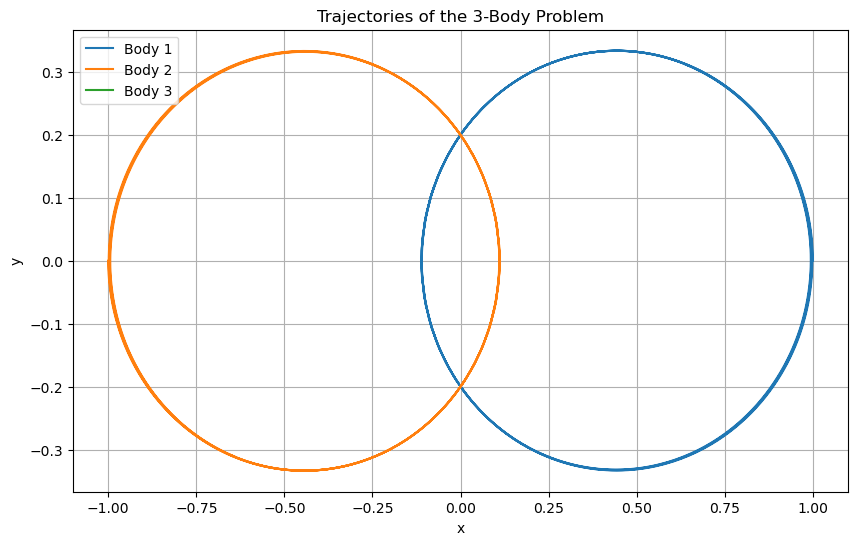

In [5]:
# Define the system of ODEs for the 3-body problem
def three_body_ode(y, t):
    # Extract positions and velocities
    x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3 = y

    # Define masses
    m1, m2, m3 = 1.0, 1.0, 1.0  # Assuming equal masses for simplicity

    # Calculate distances
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)

    # Calculate forces
    Fx1 = m2 * (x2 - x1) / r12**3 + m3 * (x3 - x1) / r13**3
    Fy1 = m2 * (y2 - y1) / r12**3 + m3 * (y3 - y1) / r13**3

    Fx2 = m1 * (x1 - x2) / r12**3 + m3 * (x3 - x2) / r23**3
    Fy2 = m1 * (y1 - y2) / r12**3 + m3 * (y3 - y2) / r23**3

    Fx3 = m1 * (x1 - x3) / r13**3 + m2 * (x2 - x3) / r23**3
    Fy3 = m1 * (y1 - y3) / r13**3 + m2 * (y2 - y3) / r23**3

    # Return the derivatives
    return np.array([vx1, vy1, Fx1, Fy1, vx2, vy2, Fx2, Fy2, vx3, vy3, Fx3, Fy3])

# 4th order Runge-Kutta method
def runge_kutta_4(f, y0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    for i in range(1, len(t)):
        t_current = t[i-1]
        y_current = y[i-1]

        k1 = dt * f(y_current, t_current)
        k2 = dt * f(y_current + 0.5 * k1, t_current + 0.5 * dt)
        k3 = dt * f(y_current + 0.5 * k2, t_current + 0.5 * dt)
        k4 = dt * f(y_current + k3, t_current + dt)

        y[i] = y_current + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t, y

# Parameters
t0 = 0
tf = 10
dt = 0.01

# Initial conditions - to test: [x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3]
y0 = np.array([1.0, 0.0, 0.0, 0.5, -1.0, 0.0, 0.0, -0.5, 0.0, 0.0, 0.0, 0.0])

# Solve the ODE using Runge-Kutta 4th order
t, y = runge_kutta_4(three_body_ode, y0, t0, tf, dt)

# Plot the trajectories
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], label='Body 1')
plt.plot(y[:, 4], y[:, 5], label='Body 2')
plt.plot(y[:, 8], y[:, 9], label='Body 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of the 3-Body Problem')
plt.legend()
plt.grid(True)
plt.show()


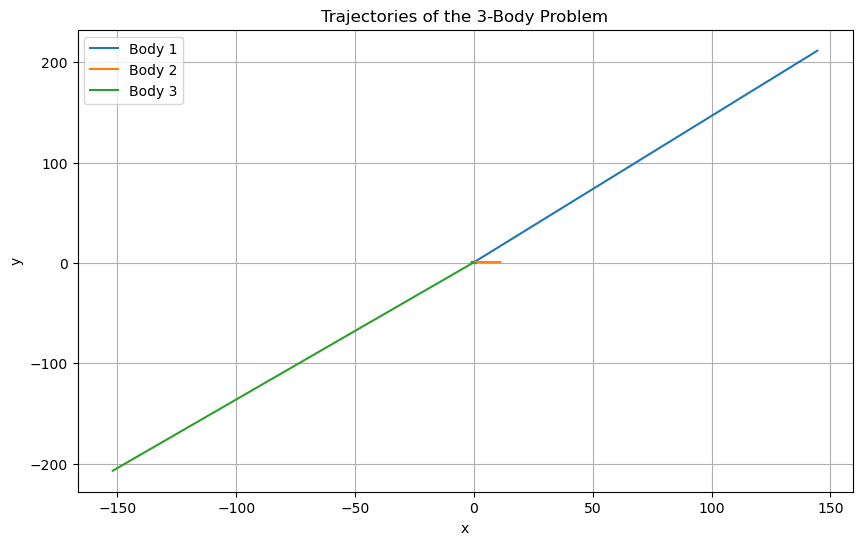

In [6]:
# Define the system of ODEs for the 3-body problem
def three_body_ode(y, t):
    # Extract positions and velocities
    x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3 = y

    # Define masses
    m1 = m2 = m3 = 1.0

    # Calculate distances
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)

    # Calculate forces
    Fx1 = m2 * (x2 - x1) / r12**3 + m3 * (x3 - x1) / r13**3
    Fy1 = m2 * (y2 - y1) / r12**3 + m3 * (y3 - y1) / r13**3

    Fx2 = m1 * (x1 - x2) / r12**3 + m3 * (x3 - x2) / r23**3
    Fy2 = m1 * (y1 - y2) / r12**3 + m3 * (y3 - y2) / r23**3

    Fx3 = m1 * (x1 - x3) / r13**3 + m2 * (x2 - x3) / r23**3
    Fy3 = m1 * (y1 - y3) / r13**3 + m2 * (y2 - y3) / r23**3

    # Return the derivatives
    return np.array([vx1, vy1, Fx1, Fy1, vx2, vy2, Fx2, Fy2, vx3, vy3, Fx3, Fy3])

# 4th order Runge-Kutta method
def runge_kutta_4(f, y0, t0, tf, dt):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    y = np.zeros((num_steps + 1, len(y0)))
    y[0] = y0

    for i in range(num_steps):
        t_current = t[i]
        y_current = y[i]

        k1 = dt * f(y_current, t_current)
        k2 = dt * f(y_current + 0.5 * k1, t_current + 0.5 * dt)
        k3 = dt * f(y_current + 0.5 * k2, t_current + 0.5 * dt)
        k4 = dt * f(y_current + k3, t_current + dt)

        y[i + 1] = y_current + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t, y

# Parameters
t0 = 0
tf = 10
dt = 0.01  # Step size

# Initial conditions: [x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3]
y0 = np.array([
    0.97000436, -0.24308753,  # (y1, y2) for body 1
    0.0, 0.0,  # (y3, y4) for body 1
    -0.93240737, 0.86473146,  # (y5, y6) for body 2
    0.93240737, 0.86473146,  # (y7, y8) for body 2
    -0.97000436, 0.24308753,  # (y9, y10) for body 3
    -0.46620368, -0.43236573  # (y11, y12) for body 3
])

# Solve the ODE using Runge-Kutta 4th order
t, y = runge_kutta_4(three_body_ode, y0, t0, tf, dt)

# Plot the trajectories
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], label='Body 1')
plt.plot(y[:, 4], y[:, 5], label='Body 2')
plt.plot(y[:, 8], y[:, 9], label='Body 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of the 3-Body Problem')
plt.legend()
plt.grid(True)
plt.show()


## 3. Pythagorean Three-body Setup

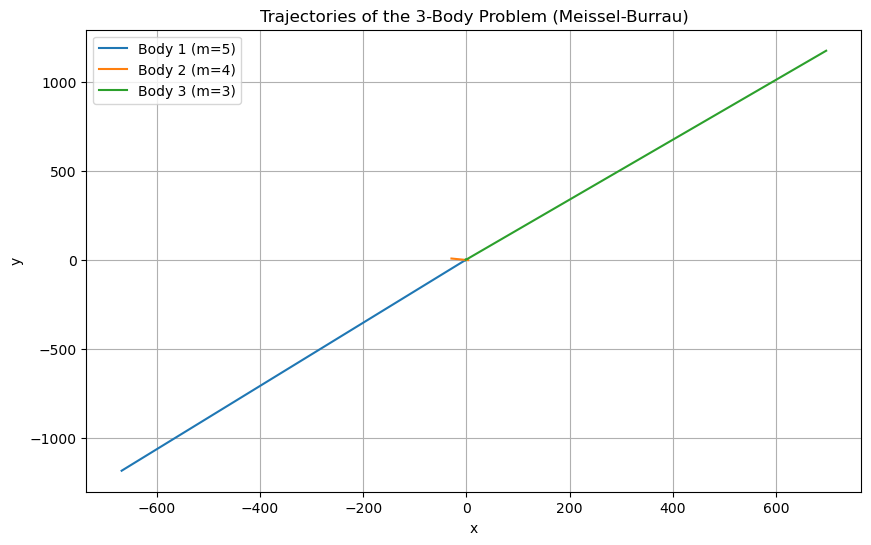

In [7]:
# Parameters
t0 = 0
tf = 100  # Integrate until the system dissolves
dt = 0.1  # Step size

# Calculate the center of mass
m1, m2, m3 = 5.0, 4.0, 3.0
x1, y1 = 0, 0
x2, y2 = 5, 0
x3, y3 = 0, 3

# Calculate the center of mass coordinates
x_com = (m1 * x1 + m2 * x2 + m3 * x3) / (m1 + m2 + m3)
y_com = (m1 * y1 + m2 * y2 + m3 * y3) / (m1 + m2 + m3)

# Shift the positions to the center of mass
x1 -= x_com
y1 -= y_com
x2 -= x_com
y2 -= y_com
x3 -= x_com
y3 -= y_com

# Initial conditions: [x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3]
y0 = np.array([
    x1, y1, 0.0, 0.0,  # Body 1
    x2, y2, 0.0, 0.0,  # Body 2
    x3, y3, 0.0, 0.0   # Body 3
])

# Solve the ODE using Runge-Kutta 4th order
t, y = runge_kutta_4(three_body_ode, y0, t0, tf, dt)

# Plot the trajectories
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], label='Body 1 (m=5)')
plt.plot(y[:, 4], y[:, 5], label='Body 2 (m=4)')
plt.plot(y[:, 8], y[:, 9], label='Body 3 (m=3)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of the 3-Body Problem (Meissel-Burrau)')
plt.legend()
plt.grid(True)
plt.show()

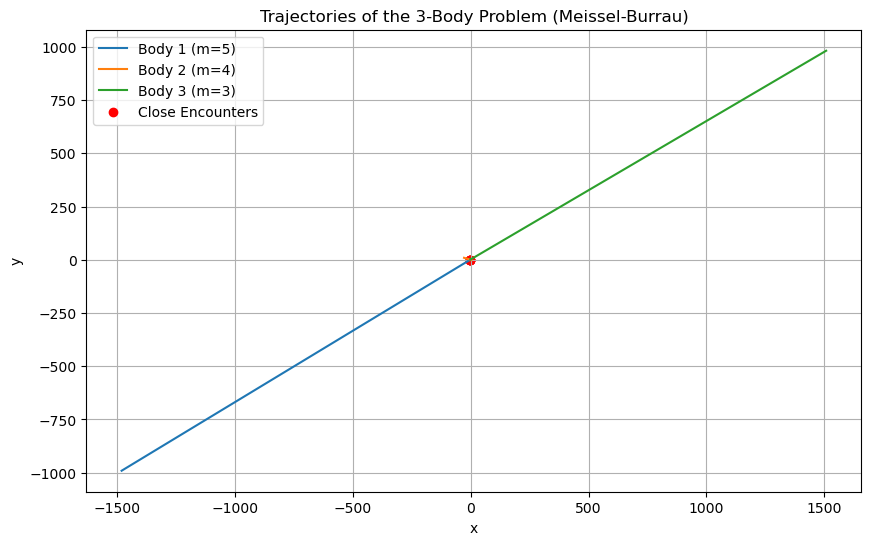

First five close encounters at times: [3.88 3.89 3.9  3.91 3.92]


In [8]:
# Parameters
t0 = 0
tf = 100  # Integrate until the system dissolves
dt = 0.01  # Step size

# Calculate the center of mass
m1, m2, m3 = 5.0, 4.0, 3.0
x1, y1 = 0, 0
x2, y2 = 5, 0
x3, y3 = 0, 3

# Calculate the center of mass coordinates
x_com = (m1 * x1 + m2 * x2 + m3 * x3) / (m1 + m2 + m3)
y_com = (m1 * y1 + m2 * y2 + m3 * y3) / (m1 + m2 + m3)

# Shift the positions to the center of mass
x1 -= x_com
y1 -= y_com
x2 -= x_com
y2 -= y_com
x3 -= x_com
y3 -= y_com

# Initial conditions: [x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3]
y0 = np.array([
    x1, y1, 0.0, 0.0,  # Body 1
    x2, y2, 0.0, 0.0,  # Body 2
    x3, y3, 0.0, 0.0   # Body 3
])

# Solve the ODE using Runge-Kutta 4th order
t, y = runge_kutta_4(three_body_ode, y0, t0, tf, dt)

# Calculate distances between bodies
distances_12 = np.sqrt((y[:, 4] - y[:, 0])**2 + (y[:, 5] - y[:, 1])**2)
distances_13 = np.sqrt((y[:, 8] - y[:, 0])**2 + (y[:, 9] - y[:, 1])**2)
distances_23 = np.sqrt((y[:, 8] - y[:, 4])**2 + (y[:, 9] - y[:, 5])**2)

# Find the times of minimum separations
min_indices_12 = np.argpartition(distances_12, 5)[:5]
min_indices_13 = np.argpartition(distances_13, 5)[:5]
min_indices_23 = np.argpartition(distances_23, 5)[:5]

# Combine and sort the indices
min_indices = np.sort(np.concatenate((min_indices_12, min_indices_13, min_indices_23)))

# Remove duplicates and keep the first five unique indices
unique_min_indices = np.unique(min_indices)[:5]

# Save the first five close encounters
close_encounters = t[unique_min_indices]

# Plot the trajectories
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], label='Body 1 (m=5)')
plt.plot(y[:, 4], y[:, 5], label='Body 2 (m=4)')
plt.plot(y[:, 8], y[:, 9], label='Body 3 (m=3)')
plt.scatter(y[unique_min_indices, 0], y[unique_min_indices, 1], color='red', label='Close Encounters')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of the 3-Body Problem (Meissel-Burrau)')
plt.legend()
plt.grid(True)
plt.show()

print("First five close encounters at times:", close_encounters)


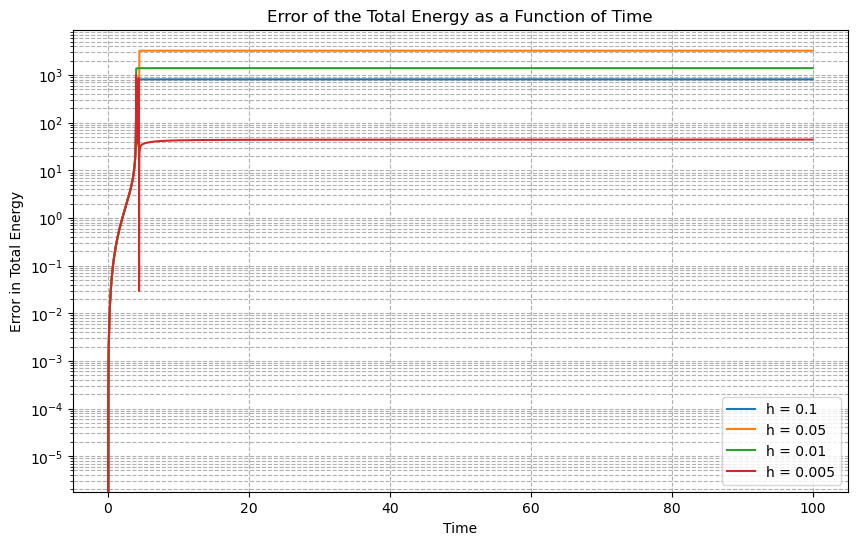

In [11]:
def total_energy(y):
    # Extract positions and velocities
    x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3 = y

    # Define masses
    m1, m2, m3 = 5.0, 4.0, 3.0

    # Calculate distances
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)

    # Kinetic energy
    KE = 0.5 * (m1 * (vx1**2 + vy1**2) + m2 * (vx2**2 + vy2**2) + m3 * (vx3**2 + vy3**2))

    # Potential energy
    PE = - (m1 * m2 / r12 + m1 * m3 / r13 + m2 * m3 / r23)

    # Total energy
    return KE + PE

# Parameters
t0 = 0
tf = 100  # Integrate until the system dissolves
step_sizes = [0.1, 0.05, 0.01, 0.005]  # Different step sizes

# Calculate the center of mass
m1, m2, m3 = 5.0, 4.0, 3.0
x1, y1 = 0, 0
x2, y2 = 5, 0
x3, y3 = 0, 3

# Calculate the center of mass coordinates
x_com = (m1 * x1 + m2 * x2 + m3 * x3) / (m1 + m2 + m3)
y_com = (m1 * y1 + m2 * y2 + m3 * y3) / (m1 + m2 + m3)

# Shift the positions to the center of mass
x1 -= x_com
y1 -= y_com
x2 -= x_com
y2 -= y_com
x3 -= x_com
y3 -= y_com

# Initial conditions: [x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3]
y0 = np.array([
    x1, y1, 0.0, 0.0,  # Body 1
    x2, y2, 0.0, 0.0,  # Body 2
    x3, y3, 0.0, 0.0   # Body 3
])

# Calculate the initial total energy
initial_energy = total_energy(y0)

# Plot the error of the total energy as a function of time for different step sizes
plt.figure(figsize=(10, 6))

for dt in step_sizes:
    # Solve the ODE using Runge-Kutta 4th order
    t, y = runge_kutta_4(three_body_ode, y0, t0, tf, dt)

    # Calculate the total energy at each time step
    energies = np.array([total_energy(y[i]) for i in range(len(t))])

    # Calculate the error in total energy
    energy_errors = np.abs(energies - initial_energy)

    # Plot the error
    plt.semilogy(t, energy_errors, label=f'h = {dt}')

plt.xlabel('Time')
plt.ylabel('Error in Total Energy')
plt.title('Error of the Total Energy as a Function of Time')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


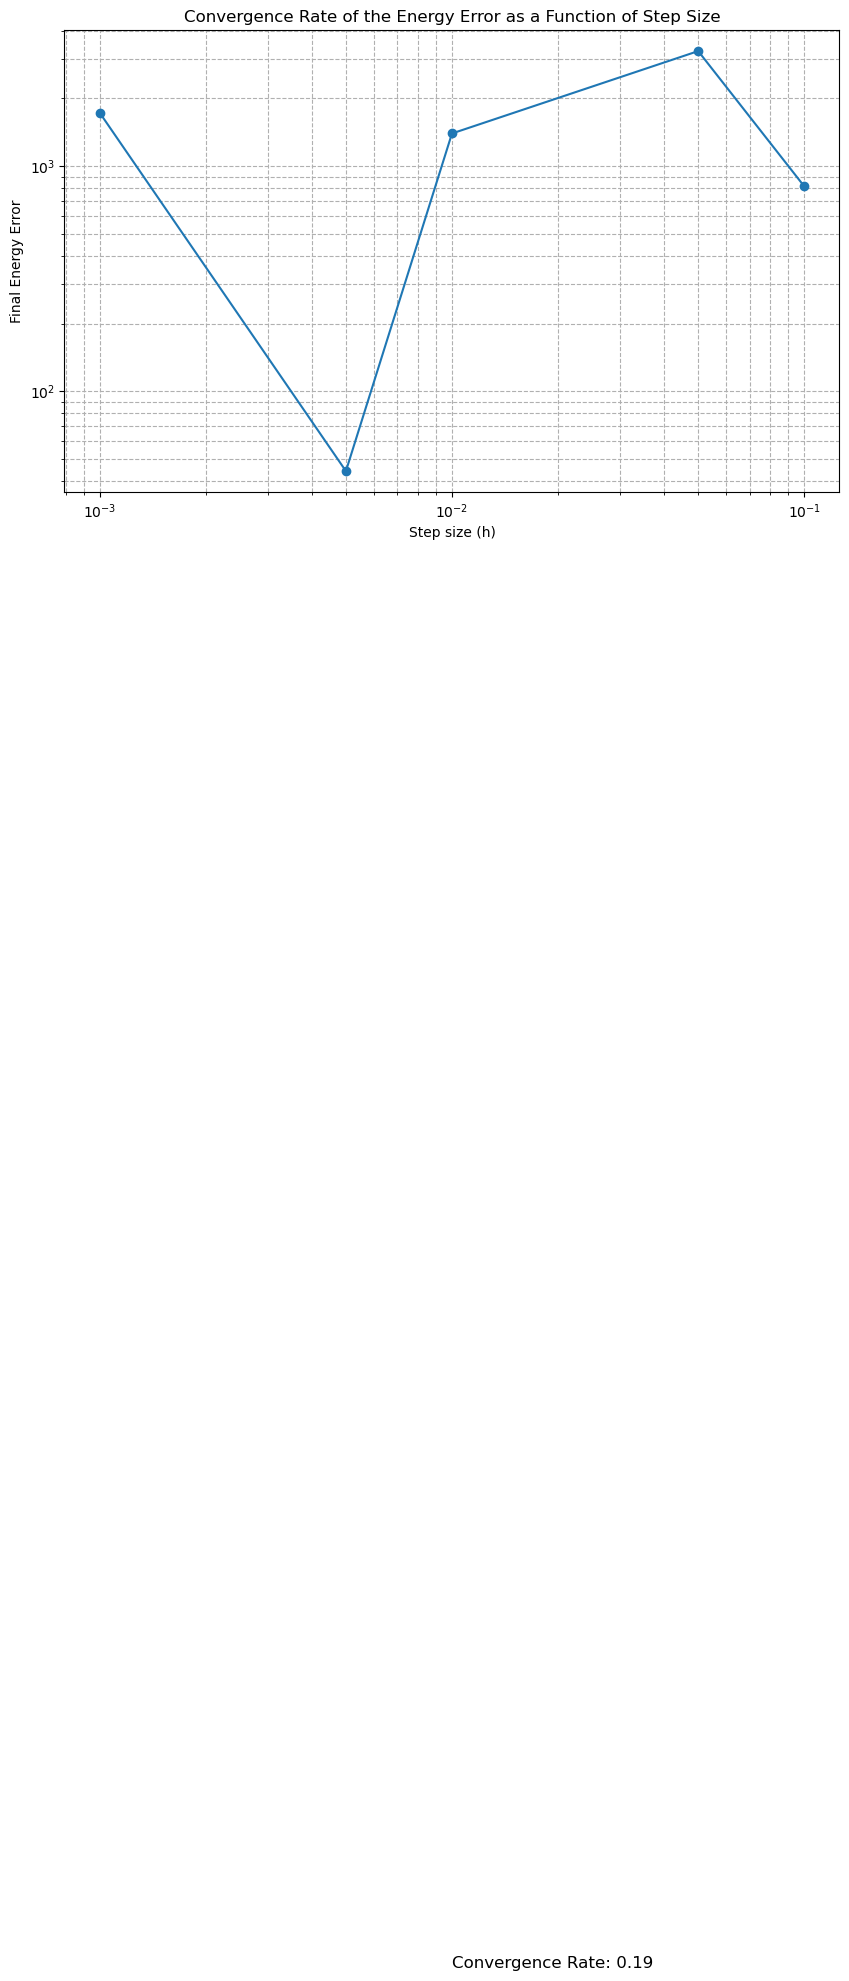

In [12]:
# Parameters
t0 = 0
tf = 100  # Integrate until the system dissolves
step_sizes = [0.1, 0.05, 0.01, 0.005, 0.001]  # Different step sizes

# Calculate the center of mass
m1, m2, m3 = 5.0, 4.0, 3.0
x1, y1 = 0, 0
x2, y2 = 5, 0
x3, y3 = 0, 3

# Calculate the center of mass coordinates
x_com = (m1 * x1 + m2 * x2 + m3 * x3) / (m1 + m2 + m3)
y_com = (m1 * y1 + m2 * y2 + m3 * y3) / (m1 + m2 + m3)

# Shift the positions to the center of mass
x1 -= x_com
y1 -= y_com
x2 -= x_com
y2 -= y_com
x3 -= x_com
y3 -= y_com

# Initial conditions: [x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3]
y0 = np.array([
    x1, y1, 0.0, 0.0,  # Body 1
    x2, y2, 0.0, 0.0,  # Body 2
    x3, y3, 0.0, 0.0   # Body 3
])

# Calculate the initial total energy
initial_energy = total_energy(y0)

# Store the final energy errors for different step sizes
final_energy_errors = []

# Perform integration with different step sizes
for dt in step_sizes:
    # Solve the ODE using Runge-Kutta 4th order
    t, y = runge_kutta_4(three_body_ode, y0, t0, tf, dt)

    # Calculate the total energy at each time step
    energies = np.array([total_energy(y[i]) for i in range(len(t))])

    # Calculate the error in total energy
    energy_errors = np.abs(energies - initial_energy)

    # Store the final energy error
    final_energy_errors.append(energy_errors[-1])

# Plot the convergence rate
plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, final_energy_errors, 'o-', label='Energy Error')
plt.xlabel('Step size (h)')
plt.ylabel('Final Energy Error')
plt.title('Convergence Rate of the Energy Error as a Function of Step Size')
plt.grid(True, which="both", ls="--")

# Fit a line to estimate the convergence rate
coefficients = np.polyfit(np.log(step_sizes), np.log(final_energy_errors), 1)
convergence_rate = coefficients[0]
plt.text(0.01, 1e-5, f'Convergence Rate: {convergence_rate:.2f}', fontsize=12)

plt.show()


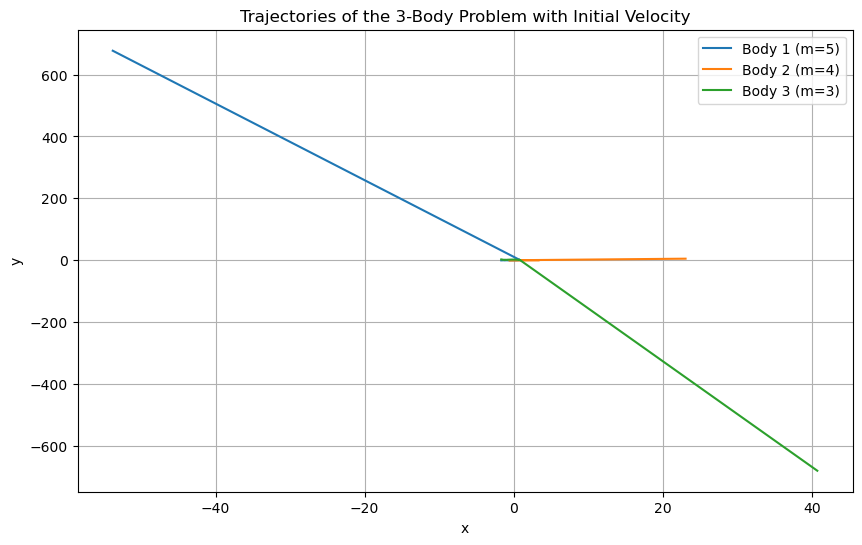

In [13]:
# Parameters
t0 = 0
tf = 100  # Integrate until the system dissolves
dt = 0.001  # Step size for reliable results

# Calculate the center of mass
m1, m2, m3 = 5.0, 4.0, 3.0
x1, y1 = 0, 0
x2, y2 = 5, 0
x3, y3 = 0, 3

# Calculate the center of mass coordinates
x_com = (m1 * x1 + m2 * x2 + m3 * x3) / (m1 + m2 + m3)
y_com = (m1 * y1 + m2 * y2 + m3 * y3) / (m1 + m2 + m3)

# Shift the positions to the center of mass
x1 -= x_com
y1 -= y_com
x2 -= x_com
y2 -= y_com
x3 -= x_com
y3 -= y_com

# Calculate the direction vector from the most massive body to the intermediate mass body
direction_x = x2 - x1
direction_y = y2 - y1
direction_magnitude = np.sqrt(direction_x**2 + direction_y**2)

# Normalize the direction vector
direction_x /= direction_magnitude
direction_y /= direction_magnitude

# Add initial velocity to the most massive body in the direction towards the intermediate mass body
v = 0.1
vx1 = v * direction_x
vy1 = v * direction_y

# Initial conditions: [x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3]
y0 = np.array([
    x1, y1, vx1, vy1,  # Body 1 (most massive)
    x2, y2, 0.0, 0.0,  # Body 2 (intermediate mass)
    x3, y3, 0.0, 0.0   # Body 3 (least massive)
])

# Solve the ODE using Runge-Kutta 4th order
t, y = runge_kutta_4(three_body_ode, y0, t0, tf, dt)

# Plot the trajectories
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], label='Body 1 (m=5)')
plt.plot(y[:, 4], y[:, 5], label='Body 2 (m=4)')
plt.plot(y[:, 8], y[:, 9], label='Body 3 (m=3)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of the 3-Body Problem with Initial Velocity')
plt.legend()
plt.grid(True)
plt.show()
